#**Bootcamp Arquiteto de Machine Learning**

Desafio do Módulo 1

##Carga da Base de Dados

###Carrega a base de Dados e deixa na pasta TMP

In [1]:

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip


--2023-01-28 13:02:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.5MB/s    in 3.9s    

2023-01-28 13:02:35 (16.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



###Importa bibliotecas e abre pastas com o zip baixado

In [2]:
import os, cv2, numpy as np
import zipfile
from matplotlib import pyplot as plt #importa bilbioteca para criação de gráficos
from sklearn.model_selection import train_test_split

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')

zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train') #Diretório de Treinamento
validation_dir = os.path.join(base_dir,'validation')  #Diretório de Validação

train_cats_dir = os.path.join(train_dir,'cats') # Diretório com imagens de treinamentos de gatos
train_dogs_dir = os.path.join(train_dir, 'dogs') # Diretório com imagens de treinamentos de cachorros

validation_cats_dir = os.path.join(validation_dir,'cats') # Diretório com imagens de testes de gatos
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Diretório com imagens de testes de cachorros



###Abre os arquivos e cria as categorias 

In [92]:

def load_images_folder(folder, categoria):
  images = []
  categorias = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
      #images.append(img)
      #Redimensiona imagem conforme questão
      img2 = cv2.resize(img,(220,128))
      images.append(img2)
      categorias.append(categoria)
  return images, categorias

lista_x1, lista_y1 = load_images_folder(train_cats_dir,0)
lista_x2, lista_y2 = load_images_folder(train_dogs_dir,1)
lista_x3, lista_y3 = load_images_folder(validation_cats_dir,0)
lista_x4, lista_y4 = load_images_folder(validation_dogs_dir,1)



In [94]:
#Exibe a quantidade de imagens carregadas
print(len(lista_x1))
print(len(lista_x2))
print(len(lista_x3))
print(len(lista_x4))

lista_imagens = lista_x1 + lista_x2 + lista_x3 + lista_x4
lista_categorias = lista_y1 + lista_y2 + lista_y3 + lista_y4

print("Total Imagens: ",len(lista_imagens))
print("Total Categorias: ",len(lista_categorias))


1000
1000
500
500
Total Imagens:  3000
Total Categorias:  3000


###Exibe uma imagem de exemplo, após redimensionar

Para testes, exibe uma imagem e sua categoria. Imagem escolhida aleatoriamente.

Imagem Index:  1358
Categoria:  1


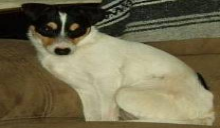

In [96]:
from PIL import Image  # Importa biblioteca de image
import numpy as np # Importa numpy
from google.colab.patches import cv2_imshow # Importa módulo para imprimir imagem
import random
 
index =random.randint(0,len(lista_categorias))
print("Imagem Index: ",index)

print("Categoria: ",lista_categorias[index])
img = np.array(lista_imagens[index])
cv2_imshow(img)



##Augmentation - imagens sintéticas


###Utiliza o Augmentation para gerar novas imagens sintéticas

In [97]:
from keras.preprocessing.image import ImageDataGenerator # Importa biblioteca de data augmentation

#Função para gerar N imagens sintéticas
def gerarImagemSintetica(img, qtd):
  # Cria o objeto de data agumentation
  #Varia altura e largura em 20%, rotação em 45graus e zoom entre de 0.8 e 1
  shift_altura = 0.2 #20%
  shift_largura = 0.2 #20%
  rotação_angulo = 45 #45 graus
  zoom_start_end = [0.8, 1.0] #Define o Zoom entre 0.8 e 1

  aug = ImageDataGenerator(height_shift_range=shift_altura, width_shift_range=shift_largura, 
                           rotation_range=rotação_angulo, zoom_range=zoom_start_end)

  # adiciona uma nova dimensão
  imagem = np.array(img)
  imagem = np.expand_dims(imagem, axis=0)

  # Realiza data augmentation com a imagem passada
  imageGen = aug.flow(imagem, batch_size = 1)

  resultado = []

  # Imprime imagens geradas
  for i in range(qtd):
    next = imageGen.next()
    resultado.append(next[0,:,:,:])#Retira uma dimensão que foi adicionada no início.
  return resultado

lista_imagens_sinteticas = []
lista_categorias_sinteticas = []
for i in range(len(lista_imagens)):
  
  #São 3000 imagens na base. Vamos só pegar 3 em 3 para ficar ao todo 1000, conforme solciitados
  if ( i% 3 != 0):
    continue

  imagem = lista_imagens[i]
  categoria = lista_categorias[i]

  #Coloca a categoria na categoria buscada
  lista_categorias_sinteticas.append(categoria)
  lista_imagens_sinteticas = lista_imagens_sinteticas + gerarImagemSintetica(imagem,1)


print("Imagens Sinteticas Geradas: ", len(lista_imagens_sinteticas))

#Junta as imagens sinteticas no final da base
lista_imagens = lista_imagens + lista_imagens_sinteticas
lista_categorias = lista_categorias + lista_categorias_sinteticas

print("Total de imagens na base: ", len(lista_imagens))
print("Total de Categorias na base: ", len(lista_categorias))

Imagens Sinteticas Geradas:  1000
Total de imagens na base:  4000
Total de Categorias na base:  4000


##Separa os dados de treinamento e testes

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lista_imagens, lista_categorias, test_size=0.30)
print("Tamanho treinamento: ",len(X_train))
print("Tamanho testes: ",len(X_test))

Tamanho treinamento:  2800
Tamanho testes:  1200


In [ ]:
print(X_train[0].shape)

(499, 376, 3)


##Carregar redes

###Importa e carrega as redes solicitadas. 

Na importação, foram utilizadas as configurações definidas no enunciado das questões.

In [99]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import ResNet152
from keras.utils import np_utils

model_vgg16 = VGG16(weights=None, input_shape=(220,128,3), classes=2)
model_vgg19 = VGG19(weights=None, input_shape=(220,128,3), classes=2)
model_resnet = ResNet152(weights=None,input_shape=(220,128,3), classes=2)


###Exibe resumo das redes carregadas

In [ ]:
print(model_vgg16.summary())


In [ ]:
print(model_vgg19.summary())

In [ ]:
print(model_resnet.summary())

###Compila e treina rede VGG16

In [103]:
print(type(X_train))
print(type(X_train[0]))


<class 'list'>
<class 'numpy.ndarray'>


In [104]:
#X_train, X_test, y_train, y_test

num_pixels = X_train[0].shape[1] * X_train[0].shape[2]
print(X_train[0].shape)
print(num_pixels)

#Põe as saídas categorizadas numericamente
y_train_categorias = np_utils.to_categorical(y_train, dtype ="uint8") 
y_test_categorias = np_utils.to_categorical(y_test, dtype ="uint8") 

#transforma os valores dos pixels para float32
#x_train2 = X_train[0].reshape(X_train.shape[0],num_pixels).astype('float32')
#x_test2 = X_test[0].reshape(X_test.shape[0],num_pixels).astype('float32')

#Normaliza os dados de 0-255 para 0-1
x_train2 = x_train / 255
x_test2 = x_test / 255


#model_vgg16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) #Compila o modelo criado
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compila o modelo criado

result_vgg16 = model.fit(x_train2, y_train_categorias, validation_data=(x_test2, y_test_categorias), 
                         epochs=20, verbose=1, batch_size=100) #Executa treinamento

(128, 220, 3)
660


NameError: ignored

In [107]:
from keras.datasets import fashion_mnist
xxx = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [114]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)

(60000, 28, 28)
